In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
movies = pd.read_csv("D:/Data Science/Data Science/Assignments/9 Association Rule/my_movies.csv")

In [3]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
#EDA

In [5]:
movies_x = movies.drop(movies.columns[5:16],axis=1)
movies_x.fillna('null',inplace=True)
movies_x

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,null,null
2,LOTR1,LOTR2,null,null,null
3,Gladiator,Patriot,Sixth Sense,null,null
4,Gladiator,Patriot,Sixth Sense,null,null
5,Gladiator,Patriot,Sixth Sense,null,null
6,Harry Potter1,Harry Potter2,null,null,null
7,Gladiator,Patriot,null,null,null
8,Gladiator,Patriot,Sixth Sense,null,null
9,Sixth Sense,LOTR,Gladiator,Green Mile,null


In [6]:
# Converting dataframe into list
movies_list = movies_x.to_numpy().tolist()
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'null', 'null'],
 ['LOTR1', 'LOTR2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Harry Potter1', 'Harry Potter2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'null']]

In [7]:
#Removing null values
j=len(movies_list)
i=0
while i < j:
    while 'null' in movies_list[i]:
        movies_list[i].remove('null')
    i+=1

In [8]:
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [9]:
#Storing in single list
all_movies_list = [movie for transaction in movies_list for movie in transaction]
print(all_movies_list)
len(all_movies_list)

['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2', 'Gladiator', 'Patriot', 'Braveheart', 'LOTR1', 'LOTR2', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Harry Potter1', 'Harry Potter2', 'Gladiator', 'Patriot', 'Gladiator', 'Patriot', 'Sixth Sense', 'Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']


30

In [10]:
from collections import Counter
from collections import OrderedDict

movie_frequency=Counter(all_movies_list)
print("Old data",movie_frequency)

movie_frequency=sorted(movie_frequency.items(), key = lambda x:x[1]) 
print("\nSorted Data:\n",movie_frequency)

#Split Items and their frequency
frequencies = list(reversed([i[1] for i in movie_frequency]))
movies = list(reversed([i[0] for i in movie_frequency]))

print("\n Movie List:",movies)
print("\n Movie Frequency",frequencies)

Old data Counter({'Gladiator': 7, 'Sixth Sense': 6, 'Patriot': 6, 'LOTR1': 2, 'Harry Potter1': 2, 'Green Mile': 2, 'LOTR2': 2, 'Braveheart': 1, 'Harry Potter2': 1, 'LOTR': 1})

Sorted Data:
 [('Braveheart', 1), ('Harry Potter2', 1), ('LOTR', 1), ('LOTR1', 2), ('Harry Potter1', 2), ('Green Mile', 2), ('LOTR2', 2), ('Sixth Sense', 6), ('Patriot', 6), ('Gladiator', 7)]

 Movie List: ['Gladiator', 'Patriot', 'Sixth Sense', 'LOTR2', 'Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR', 'Harry Potter2', 'Braveheart']

 Movie Frequency [7, 6, 6, 2, 2, 2, 2, 1, 1, 1]


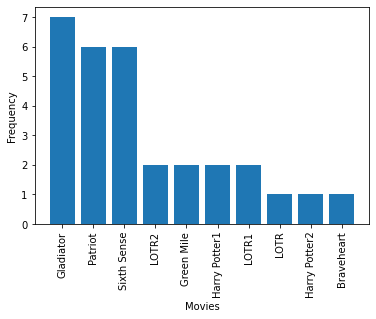

In [11]:
#Visualizing the data
import matplotlib.pyplot as plt

plt.bar (movies,frequencies)
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [12]:
#Creating a dataframe
movie_series  = pd.DataFrame(pd.Series(movies_list))
movie_series.columns = ["Movie_Series"]
print(movie_series)

                                        Movie_Series
0  [Sixth Sense, LOTR1, Harry Potter1, Green Mile...
1                   [Gladiator, Patriot, Braveheart]
2                                     [LOTR1, LOTR2]
3                  [Gladiator, Patriot, Sixth Sense]
4                  [Gladiator, Patriot, Sixth Sense]
5                  [Gladiator, Patriot, Sixth Sense]
6                     [Harry Potter1, Harry Potter2]
7                               [Gladiator, Patriot]
8                  [Gladiator, Patriot, Sixth Sense]
9         [Sixth Sense, LOTR, Gladiator, Green Mile]


In [13]:
X = movie_series['Movie_Series'].str.join(sep='*')
print(X)

# create dummy variable
X= X.str.get_dummies(sep='*')
X

0    Sixth Sense*LOTR1*Harry Potter1*Green Mile*LOTR2
1                        Gladiator*Patriot*Braveheart
2                                         LOTR1*LOTR2
3                       Gladiator*Patriot*Sixth Sense
4                       Gladiator*Patriot*Sixth Sense
5                       Gladiator*Patriot*Sixth Sense
6                         Harry Potter1*Harry Potter2
7                                   Gladiator*Patriot
8                       Gladiator*Patriot*Sixth Sense
9               Sixth Sense*LOTR*Gladiator*Green Mile
Name: Movie_Series, dtype: object


,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [14]:
# Association rule mining
frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

# Most Frequent item sets based on support in decending order
frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Patriot, Gladiator)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [15]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
18,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
77,(LOTR2),"(Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
74,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
73,(Green Mile),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
28,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


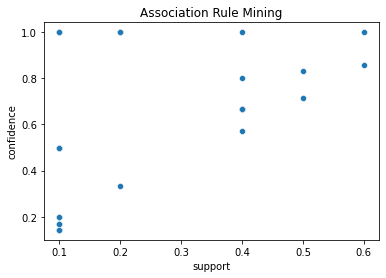

In [16]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


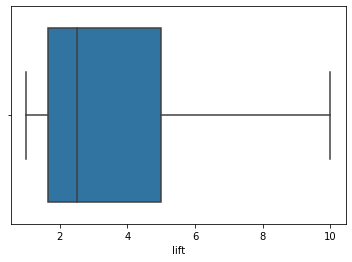

In [17]:
# Box plot
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

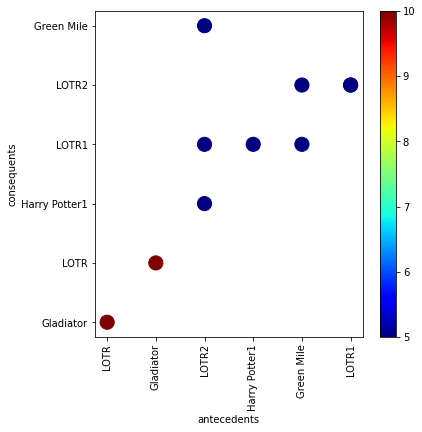

In [19]:
X1 = rules.antecedents.iloc[0:10]
Y1 = rules.consequents.iloc[0:10]
Z1 = rules.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

    # Different values of support an confidence

In [20]:
B = movie_series['Movie_Series'].str.join(sep='*')
# now each transaction is like:  fruit*yogurt*cream cheese *meat spreads
# print(X)

# create dummy variable for each 
B= B.str.get_dummies(sep='*')
B

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [21]:
#Association rule with support = .002

frequent_movies1 = apriori(B, min_support=0.002, max_len=2,use_colnames = True)
print("Raw Data:\n",frequent_movies1.head())

# Most Frequent item sets based on support in decending order
frequent_movies1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies1.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
8       0.6                 (Patriot)
14      0.6      (Patriot, Gladiator)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [22]:
rules1 = association_rules(frequent_movies1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
23,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
22,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
17,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
14,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
24,(Harry Potter1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
21,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
20,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


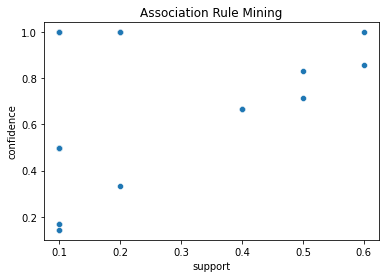

In [23]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

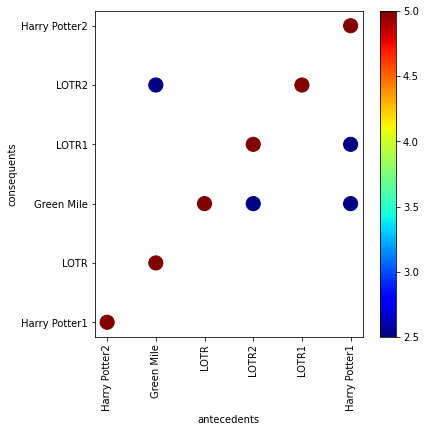

In [24]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()